<a href="https://colab.research.google.com/github/mariliabrito/DesmatamentoUCS/blob/main/An%C3%A1lise_de_Desmatamento_em_UCs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="150" title="Tail Logo" /></a>

# <font color ="#00b8ff">Análise de Desmatamento em UCs </font>



Autores: Frankley Kaiky, Lucas Bitu, Marilia Brito, Maura Chaves, Yhasmin Tigre, Abner Lins, Franklin Anthony, Cândido Alfredo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

# Link original do CSV de Desmatamento
csv_link = "https://www.gov.br/icmbio/pt-br/acesso-a-informacao/dados-abertos/arquivos/desmatamento-em-unidades-de-conservacao-federais/desmatamento_em_unidades_de_conservacao_federal_atualizado_2020.csv"

# Conversão de CSV em DataFrame
df = pd.read_csv(csv_link, encoding = 'latin-1',delimiter=";")
df = df.drop(index=0)
df

,Código CNUC,Nome da UC,Categoria da UC: sigla federal,Categoria da UC: nomenclatura nacional,Grupo de Proteção,Ano de criação,Área estimada da UC (ha),Bioma referencial,Monitoramento PRODES,PRODES 2020,...,PRODES 2006,PRODES 2005,PRODES 2004,PRODES 2003,PRODES 2002,PRODES 2001,PRODES (1998 até 2000),PRODES (acumulado até 1997),Unnamed: 31,Unnamed: 32
1,0000.00.0001,APA Anhatomirim,APA,Área de Proteção Ambiental,uso sustentável,1992,"4436,590227",Marinho-Costeiro,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000.00.1521,APA Bacia Hidrográfica do Rio Paraíba do Sul,APA,Área de Proteção Ambiental,uso sustentável,1982,"292599,9242",Mata Atlântica,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000.00.0007,APA Barra do Rio Mamanguape,APA,Área de Proteção Ambiental,uso sustentável,1993,"14917,79128",Marinho-Costeiro,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000.00.0020,APA Carste da Lagoa Santa,APA,Área de Proteção Ambiental,uso sustentável,1990,"39957,14849",Cerrado,Sim,"10,1378",...,"293,39125","293,39125","390,6809","390,6809","333,10765","333,10765","24379,8237",NaN,NaN,NaN
5,0000.00.0002,APA Cavernas do Peruaçu,APA,Área de Proteção Ambiental,uso sustentável,1989,"143355,5857",Cerrado,Sim,"25,9009",...,"1455,18475","1455,18475","1442,04345","1442,04345","823,97995","823,97995","7048,5908",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0000.00.1880,REVIS de Una,RVS,Refúgio de Vida Silvestre,proteção integral,2007,"23423,64718",Mata Atlântica,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,0000.00.3432,REVIS do Arquipélago de Alcatrazes,RVS,Refúgio de Vida Silvestre,proteção integral,2016,67364,Marinho-Costeiro,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,0000.00.1813,REVIS do Rio dos Frades,RVS,Refúgio de Vida Silvestre,proteção integral,2007,"898,6783984",Mata Atlântica,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,0000.00.0278,REVIS dos Campos de Palmas,RVS,Refúgio de Vida Silvestre,proteção integral,2006,"16594,28695",Mata Atlântica,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <font color ="#00b8ff">Parte 1 - Introdução do Dataset </font>

In [ ]:
df.info()
#As colunas dos PRODES podem se resumir em uma coluna PRODES TOTAL pois os valores nulos são todos deles
#Os valores nulos podem ser trocados por 0 pois as colunas com valores nulos são teoricamente numéricas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 1 to 327
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Código CNUC                             327 non-null    object 
 1   Nome da UC                              327 non-null    object 
 2   Categoria da UC: sigla federal          327 non-null    object 
 3   Categoria da UC: nomenclatura nacional  327 non-null    object 
 4   Grupo de Proteção                       327 non-null    object 
 5   Ano de criação                          327 non-null    object 
 6   Área estimada da UC (ha)                327 non-null    object 
 7   Bioma referencial                       327 non-null    object 
 8   Monitoramento PRODES                    327 non-null    object 
 9   PRODES 2020                             108 non-null    object 
 10  PRODES 2019                             112 non-null    object

In [ ]:
#Valores númericos
df.describe()

#Colunas Unnamed 31 e 32 podem ser excluidas pois estão totalmente nulas

,Unnamed: 31,Unnamed: 32
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [ ]:
PRD=[]
#Lista de value counts de cada coluna, ajuda a detalhar o que está sendo tratado em cada coluna
for coluna in df.columns:
  #Retirar as colunas de PRODES 2001-2020 para não ficar uma lista gigantesca (pode-se ver o que se trata nas colunas PRODES na Coluna PRODES(1998 até 2000))
  for n in range(2001, 2021):
    if coluna == str(f'PRODES {n}'):
      PRD.append(coluna)

  if coluna not in PRD and coluna != 'PRODES (acumulado até 1997)':
    print('__'*20)
    print(coluna)
    print()
    print(df[coluna].value_counts())


________________________________________
Código CNUC

0000.00.0288    2
0000.00.0274    2
0000.00.0001    1
0000.00.0186    1
0000.00.0218    1
               ..
0000.00.0102    1
0000.00.0101    1
0000.00.0100    1
0000.00.1605    1
0000.00.0190    1
Name: Código CNUC, Length: 325, dtype: int64
________________________________________
Nome da UC

APA Anhatomirim              1
PARNA do Superagui           1
REBIO Augusto Ruschi         1
RDS Nascentes Geraizeiras    1
RDS de Itatupã-Baquiá        1
                            ..
FLONA de Paraopeba           1
FLONA de Palmares            1
FLONA de Pacotuba            1
FLONA de Nísia Floresta      1
REVIS Ilha dos Lobos         1
Name: Nome da UC, Length: 327, dtype: int64
________________________________________
Categoria da UC: sigla federal

PARNA    73
FLONA    67
RESEX    65
APA      33
ESEC     32
REBIO    31
ARIE     13
RVS       8
MONA      3
RDS       2
Name: Categoria da UC: sigla federal, dtype: int64
_____________________

In [ ]:
display(df)

,Código CNUC,Nome da UC,Categoria da UC: sigla federal,Categoria da UC: nomenclatura nacional,Grupo de Proteção,Ano de criação,Área estimada da UC (ha),Bioma referencial,Monitoramento PRODES,PRODES 2020,...,PRODES 2006,PRODES 2005,PRODES 2004,PRODES 2003,PRODES 2002,PRODES 2001,PRODES (1998 até 2000),PRODES (acumulado até 1997),Unnamed: 31,Unnamed: 32
1,0000.00.0001,APA Anhatomirim,APA,Área de Proteção Ambiental,uso sustentável,1992,"4436,590227",Marinho-Costeiro,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000.00.1521,APA Bacia Hidrográfica do Rio Paraíba do Sul,APA,Área de Proteção Ambiental,uso sustentável,1982,"292599,9242",Mata Atlântica,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000.00.0007,APA Barra do Rio Mamanguape,APA,Área de Proteção Ambiental,uso sustentável,1993,"14917,79128",Marinho-Costeiro,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000.00.0020,APA Carste da Lagoa Santa,APA,Área de Proteção Ambiental,uso sustentável,1990,"39957,14849",Cerrado,Sim,"10,1378",...,"293,39125","293,39125","390,6809","390,6809","333,10765","333,10765","24379,8237",NaN,NaN,NaN
5,0000.00.0002,APA Cavernas do Peruaçu,APA,Área de Proteção Ambiental,uso sustentável,1989,"143355,5857",Cerrado,Sim,"25,9009",...,"1455,18475","1455,18475","1442,04345","1442,04345","823,97995","823,97995","7048,5908",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0000.00.1880,REVIS de Una,RVS,Refúgio de Vida Silvestre,proteção integral,2007,"23423,64718",Mata Atlântica,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,0000.00.3432,REVIS do Arquipélago de Alcatrazes,RVS,Refúgio de Vida Silvestre,proteção integral,2016,67364,Marinho-Costeiro,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,0000.00.1813,REVIS do Rio dos Frades,RVS,Refúgio de Vida Silvestre,proteção integral,2007,"898,6783984",Mata Atlântica,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,0000.00.0278,REVIS dos Campos de Palmas,RVS,Refúgio de Vida Silvestre,proteção integral,2006,"16594,28695",Mata Atlântica,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <font color ="#00b8ff">Parte 2 - Filtragem dos Dados </font>

### <font color ="#00b8ff">Verificando valores NaN</font>

In [ ]:
df.isna().values.any() #Existem Valores NaN

True

In [ ]:
df

,Código CNUC,Nome da UC,Categoria da UC: sigla federal,Categoria da UC: nomenclatura nacional,Grupo de Proteção,Ano de criação,Área estimada da UC (ha),Bioma referencial,Monitoramento PRODES,PRODES 2020,...,PRODES 2006,PRODES 2005,PRODES 2004,PRODES 2003,PRODES 2002,PRODES 2001,PRODES (1998 até 2000),PRODES (acumulado até 1997),Unnamed: 31,Unnamed: 32
1,0000.00.0001,APA Anhatomirim,APA,Área de Proteção Ambiental,uso sustentável,1992,"4436,590227",Marinho-Costeiro,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000.00.1521,APA Bacia Hidrográfica do Rio Paraíba do Sul,APA,Área de Proteção Ambiental,uso sustentável,1982,"292599,9242",Mata Atlântica,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000.00.0007,APA Barra do Rio Mamanguape,APA,Área de Proteção Ambiental,uso sustentável,1993,"14917,79128",Marinho-Costeiro,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000.00.0020,APA Carste da Lagoa Santa,APA,Área de Proteção Ambiental,uso sustentável,1990,"39957,14849",Cerrado,Sim,"10,1378",...,"293,39125","293,39125","390,6809","390,6809","333,10765","333,10765","24379,8237",NaN,NaN,NaN
5,0000.00.0002,APA Cavernas do Peruaçu,APA,Área de Proteção Ambiental,uso sustentável,1989,"143355,5857",Cerrado,Sim,"25,9009",...,"1455,18475","1455,18475","1442,04345","1442,04345","823,97995","823,97995","7048,5908",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0000.00.1880,REVIS de Una,RVS,Refúgio de Vida Silvestre,proteção integral,2007,"23423,64718",Mata Atlântica,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324,0000.00.3432,REVIS do Arquipélago de Alcatrazes,RVS,Refúgio de Vida Silvestre,proteção integral,2016,67364,Marinho-Costeiro,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,0000.00.1813,REVIS do Rio dos Frades,RVS,Refúgio de Vida Silvestre,proteção integral,2007,"898,6783984",Mata Atlântica,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,0000.00.0278,REVIS dos Campos de Palmas,RVS,Refúgio de Vida Silvestre,proteção integral,2006,"16594,28695",Mata Atlântica,Não,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Unnamed: 31,Unnamed: 32
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


### <font color ="#00b8ff">Excluindo colunas inúteis</font>


In [ ]:
df = df.dropna(axis=1, how='all') #Esse comando permite retirar todas as colunas que possuem somente valores NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 1 to 327
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Código CNUC                             327 non-null    object
 1   Nome da UC                              327 non-null    object
 2   Categoria da UC: sigla federal          327 non-null    object
 3   Categoria da UC: nomenclatura nacional  327 non-null    object
 4   Grupo de Proteção                       327 non-null    object
 5   Ano de criação                          327 non-null    object
 6   Área estimada da UC (ha)                327 non-null    object
 7   Bioma referencial                       327 non-null    object
 8   Monitoramento PRODES                    327 non-null    object
 9   PRODES 2020                             108 non-null    object
 10  PRODES 2019                             112 non-null    object
 11  PRODES

### <font color ="#00b8ff">Excluindo NaNs e formatando decimais</font>

In [ ]:
df= df.fillna('0')
def filterNumericCols(x):
  return x.split()[0]== "Área" or x.split()[0] == "PRODES"

columns= filter(filterNumericCols, df.columns)

for column in columns:
  df[column]= list(map(lambda x: float(x.replace(",", ".")), df[column]))

df

,Código CNUC,Nome da UC,Categoria da UC: sigla federal,Categoria da UC: nomenclatura nacional,Grupo de Proteção,Ano de criação,Área estimada da UC (ha),Bioma referencial,Monitoramento PRODES,PRODES 2020,...,PRODES 2008,PRODES 2007,PRODES 2006,PRODES 2005,PRODES 2004,PRODES 2003,PRODES 2002,PRODES 2001,PRODES (1998 até 2000),PRODES (acumulado até 1997)
1,0000.00.0001,APA Anhatomirim,APA,Área de Proteção Ambiental,uso sustentável,1992,4436.590227,Marinho-Costeiro,Não,0.0000,...,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0
2,0000.00.1521,APA Bacia Hidrográfica do Rio Paraíba do Sul,APA,Área de Proteção Ambiental,uso sustentável,1982,292599.924200,Mata Atlântica,Não,0.0000,...,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0
3,0000.00.0007,APA Barra do Rio Mamanguape,APA,Área de Proteção Ambiental,uso sustentável,1993,14917.791280,Marinho-Costeiro,Não,0.0000,...,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0
4,0000.00.0020,APA Carste da Lagoa Santa,APA,Área de Proteção Ambiental,uso sustentável,1990,39957.148490,Cerrado,Sim,10.1378,...,218.6854,218.6854,293.39125,293.39125,390.68090,390.68090,333.10765,333.10765,24379.8237,0.0
5,0000.00.0002,APA Cavernas do Peruaçu,APA,Área de Proteção Ambiental,uso sustentável,1989,143355.585700,Cerrado,Sim,25.9009,...,127.8657,127.8657,1455.18475,1455.18475,1442.04345,1442.04345,823.97995,823.97995,7048.5908,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0000.00.1880,REVIS de Una,RVS,Refúgio de Vida Silvestre,proteção integral,2007,23423.647180,Mata Atlântica,Não,0.0000,...,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0
324,0000.00.3432,REVIS do Arquipélago de Alcatrazes,RVS,Refúgio de Vida Silvestre,proteção integral,2016,67364.000000,Marinho-Costeiro,Não,0.0000,...,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0
325,0000.00.1813,REVIS do Rio dos Frades,RVS,Refúgio de Vida Silvestre,proteção integral,2007,898.678398,Mata Atlântica,Não,0.0000,...,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0
326,0000.00.0278,REVIS dos Campos de Palmas,RVS,Refúgio de Vida Silvestre,proteção integral,2006,16594.286950,Mata Atlântica,Não,0.0000,...,0.0000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0


In [ ]:
df.isna().values.any()

False

### <font color ="#00b8ff">Verificando duplicatas</font>

In [ ]:
df.duplicated().value_counts()

False    327
dtype: int64

# <font color ="#00b8ff"> Parte 3 - Análise Descritiva das UCs</font>

In [ ]:
df.columns

Index(['Código CNUC', 'Nome da UC', 'Categoria da UC: sigla federal',
       'Categoria da UC: nomenclatura nacional', 'Grupo de Proteção',
       'Ano de criação', 'Área estimada da UC (ha)', 'Bioma referencial',
       'Monitoramento PRODES', 'PRODES 2020', 'PRODES 2019', 'PRODES 2018',
       'PRODES 2017', 'PRODES 2016', 'PRODES 2015', 'PRODES 2014',
       'PRODES 2013', 'PRODES 2012', 'PRODES 2011', 'PRODES 2010',
       'PRODES 2009', 'PRODES 2008', 'PRODES 2007', 'PRODES 2006',
       'PRODES 2005', 'PRODES 2004', 'PRODES 2003', 'PRODES 2002',
       'PRODES 2001', 'PRODES (1998 até 2000)', 'PRODES (acumulado até 1997)'],
      dtype='object')

In [ ]:
df.dtypes

Código CNUC                                object
Nome da UC                                 object
Categoria da UC: sigla federal             object
Categoria da UC: nomenclatura nacional     object
Grupo de Proteção                          object
Ano de criação                             object
Área estimada da UC (ha)                  float64
Bioma referencial                          object
Monitoramento PRODES                       object
PRODES 2020                               float64
PRODES 2019                               float64
PRODES 2018                               float64
PRODES 2017                               float64
PRODES 2016                               float64
PRODES 2015                               float64
PRODES 2014                               float64
PRODES 2013                               float64
PRODES 2012                               float64
PRODES 2011                               float64
PRODES 2010                               float64


In [ ]:
df['Ano de criação'] = df['Ano de criação'].astype('int64')

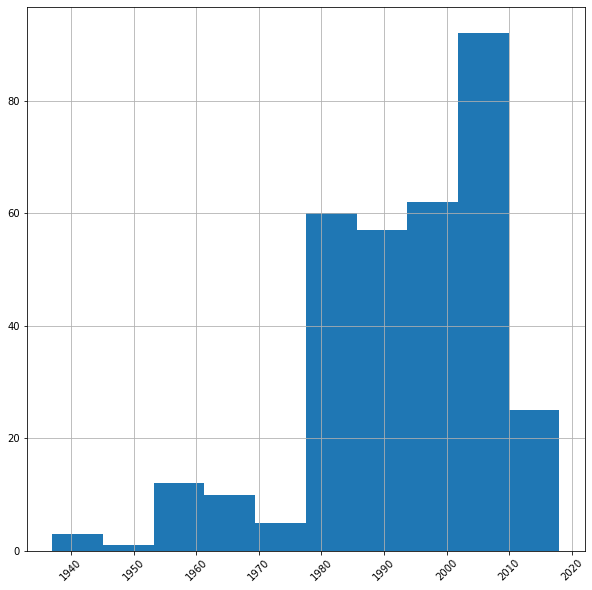

In [ ]:
# Histograma da variável 'Ano de criação'
ax = plt.figure(figsize=[10,10])
ax = df['Ano de criação'].hist()
plt.xticks(rotation=45)
plt.show()

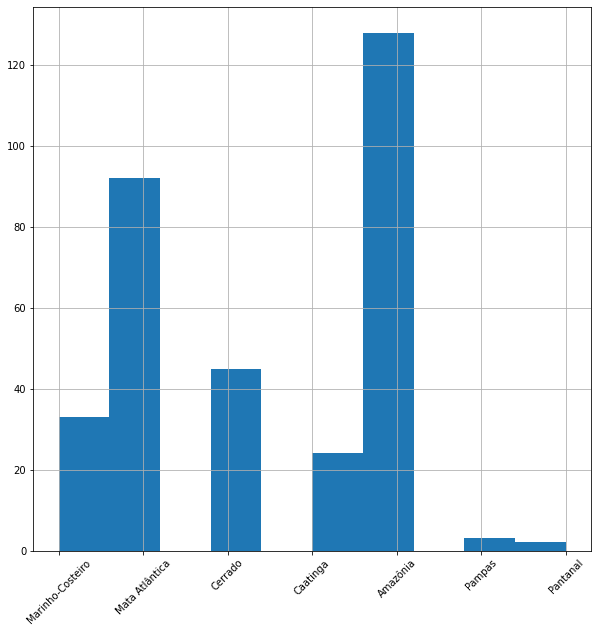

In [ ]:
ax = plt.figure(figsize=[10,10])
ax = df['Bioma referencial'].hist()
plt.xticks(rotation=45)
plt.show()

In [ ]:
px.pie(df,'Monitoramento PRODES')

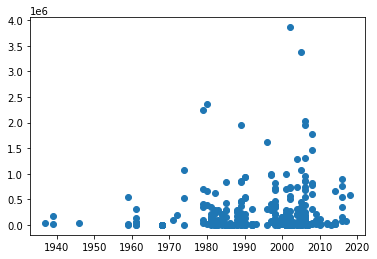

In [ ]:
plt.scatter(x=df['Ano de criação'], y=df['Área estimada da UC (ha)'])

# <font color ="#00b8ff"> Parte 4 - Análise Descritiva do Desmatamento</font>

### <font color ="#00b8ff"> Filtrando Dados </font>


In [ ]:
data = df.copy(deep=True)
data = data.drop(["Código CNUC", "Categoria da UC: sigla federal", "Nome da UC", "Categoria da UC: nomenclatura nacional", "Grupo de Proteção", "Ano de criação",
           "Área estimada da UC (ha)", "Bioma referencial", "Monitoramento PRODES"], axis = 1)

In [ ]:
labels = ['PRODES 2020', 'PRODES 2019', 'PRODES 2018', 'PRODES 2017', 'PRODES 2016', 'PRODES 2015', 'PRODES 2014', 'PRODES 2013', 'PRODES 2012', 'PRODES 2011', 'PRODES 2010', 'PRODES 2009',
          'PRODES 2008', 'PRODES 2007', 'PRODES 2006', 'PRODES 2005', 'PRODES 2004', 'PRODES 2003', 'PRODES 2002', 'PRODES 2001', 'PRODES (1998 até 2000)', "PRODES (acumulado até 1997)"]
labels = [l.replace(" ", "\n") for l in labels][::-1]


###<font color ="#00b8ff"> Desmatamento anual total e médio por UC</font>

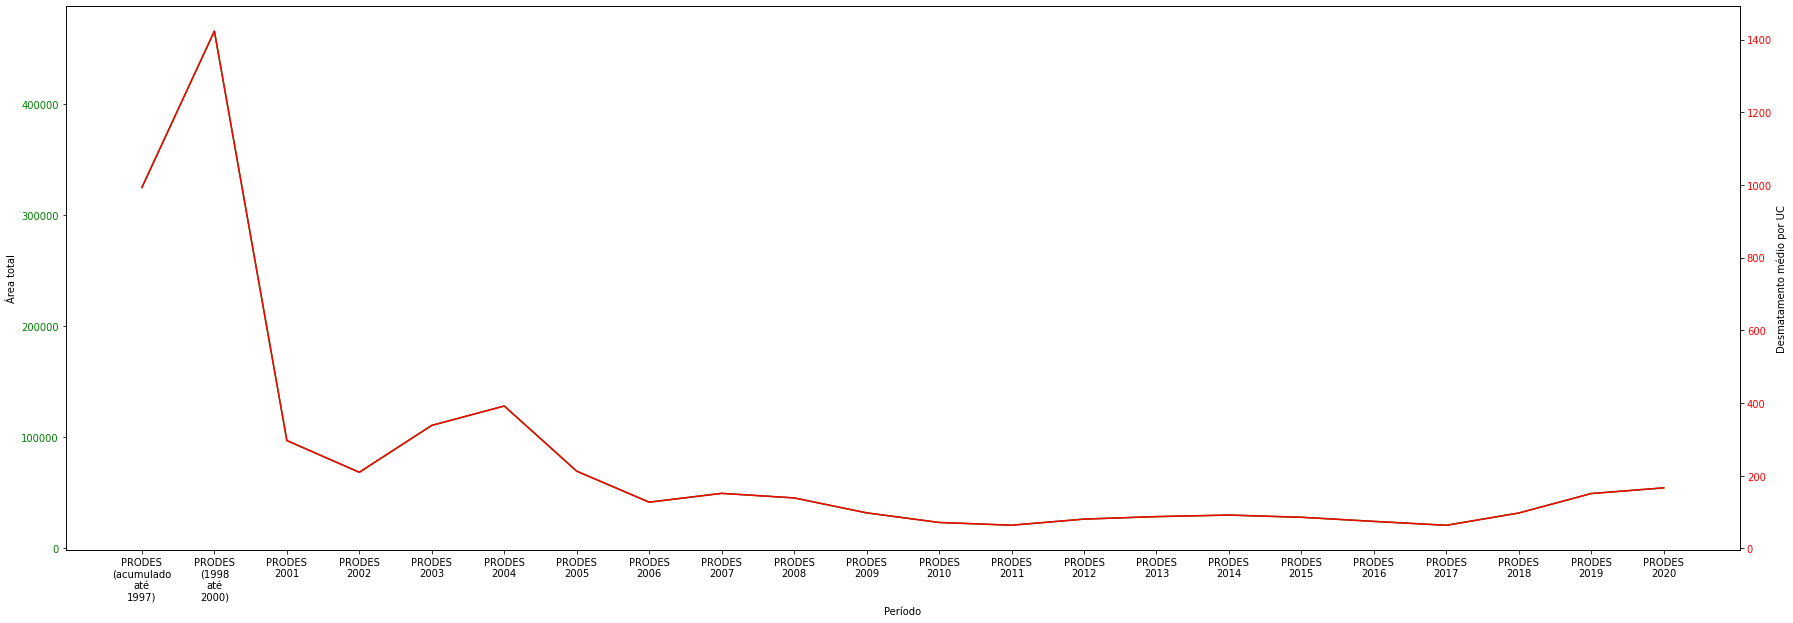

In [ ]:
somas = data.sum(axis = 0)[::-1]
medias = data.mean(axis = 0)[::-1]

fig, ax1 = plt.subplots(figsize=(30,10))

ax1.set_xlabel('Período')
ax1.set_ylabel('Área total')
ax1.plot(somas.index, somas, color = 'green')
ax1.tick_params(axis ='y', labelcolor = 'green')

ax2 = ax1.twinx()
ax2.set_ylabel('Desmatamento médio por UC')
ax2.plot(medias.index, medias, color = 'red')
ax2.tick_params(axis ='y', labelcolor = 'red')

plt.xticks(range(len(labels)), labels)

plt.show()

In [ ]:
data2 = df.copy(deep=True)
data2 = data2.drop(["Código CNUC", "Nome da UC", "Categoria da UC: nomenclatura nacional", "Grupo de Proteção", "Ano de criação",
           "Área estimada da UC (ha)", "Bioma referencial", "Monitoramento PRODES"], axis = 1)

In [ ]:
data2.groupby("Categoria da UC: sigla federal").sum()

,PRODES 2020,PRODES 2019,PRODES 2018,PRODES 2017,PRODES 2016,PRODES 2015,PRODES 2014,PRODES 2013,PRODES 2012,PRODES 2011,...,PRODES 2008,PRODES 2007,PRODES 2006,PRODES 2005,PRODES 2004,PRODES 2003,PRODES 2002,PRODES 2001,PRODES (1998 até 2000),PRODES (acumulado até 1997)
Categoria da UC: sigla federal,,,,,,,,,,,,,,,,,,,,,
APA,10126.5926,10998.5214,9930.6331,6359.0625,4955.9656,6490.7026,11597.2044,9232.0910,7096.96845,6244.86845,...,9948.73520,10093.31520,9614.72330,10833.74330,28999.62585,30203.86585,7355.44815,7392.99815,335540.7327,52426.9700
ARIE,57.7805,70.9068,55.3461,61.0874,78.4457,89.6725,137.0300,31.5125,235.99000,38.58000,...,13.75000,0.04000,0.86555,25.74555,37.06205,69.44205,25.80930,4.45930,157.3182,937.3200
ESEC,1608.6208,3335.1961,1276.3577,1160.2431,902.3028,2703.5235,278.1175,171.1869,1010.61965,676.43965,...,524.65430,2565.55200,1568.70775,6079.79060,15361.01625,8866.20465,6194.51240,4630.43345,3507.7127,8927.2629
FLONA,24377.9186,19301.1532,12767.3937,6494.8938,10505.1507,11182.8011,9929.5012,10885.4250,10026.51280,5022.69280,...,13726.60530,21490.22530,15527.50445,18098.29445,41145.20600,19534.83600,23374.20885,10660.36885,33668.3244,77006.9600
MONA,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000
PARNA,3284.5059,2217.2398,1248.3254,1577.8568,1211.9623,1446.6689,2017.3328,4080.4539,3576.33840,2986.21840,...,6686.60645,7358.10645,6052.59060,9089.55060,18254.89290,11727.77290,11886.12110,8155.89110,39850.1908,31793.5800
RDS,0.0000,0.0000,0.0000,0.0000,0.0000,14.2093,6.2687,41.0644,23.13795,23.13795,...,33.86090,33.86090,11.56840,11.56840,152.97980,136.19980,84.85830,94.91830,147.6347,0.0000
REBIO,2947.8702,1753.5155,830.6116,1092.7433,1492.1921,2594.1383,516.4441,737.4647,883.76000,1049.17000,...,5489.26000,1783.46000,3768.48030,9928.15030,8972.69000,5615.66000,7540.79840,8208.58840,13050.2454,19405.3500
RESEX,12094.8067,11717.6042,5752.3601,4054.2078,5058.7553,3505.0134,5541.1920,3455.8875,3489.67955,4816.20955,...,8461.52620,5649.24620,4925.11945,15289.69945,14736.39140,34081.04140,12023.78085,57899.57085,37781.8027,134279.5200


In [ ]:
data_uc_amount = data2.groupby(["Categoria da UC: sigla federal"]).sum().sum(axis=1)

aux_df = pd.DataFrame()
aux_df["Categoria da UC: sigla federal"] = data_uc_amount.index
aux_df["Desmatamento total"] = data_uc_amount.values
aux_df

,Categoria da UC: sigla federal,Desmatamento total
0,APA,597356.5194
1,ARIE,2186.6035
2,ESEC,72168.2643
3,FLONA,414087.0559
4,MONA,0.0000
5,PARNA,178592.3524
6,RDS,867.9745
7,REBIO,102898.6726
8,RESEX,398453.2596
9,RVS,4483.5912


(0.0, 650000.0)

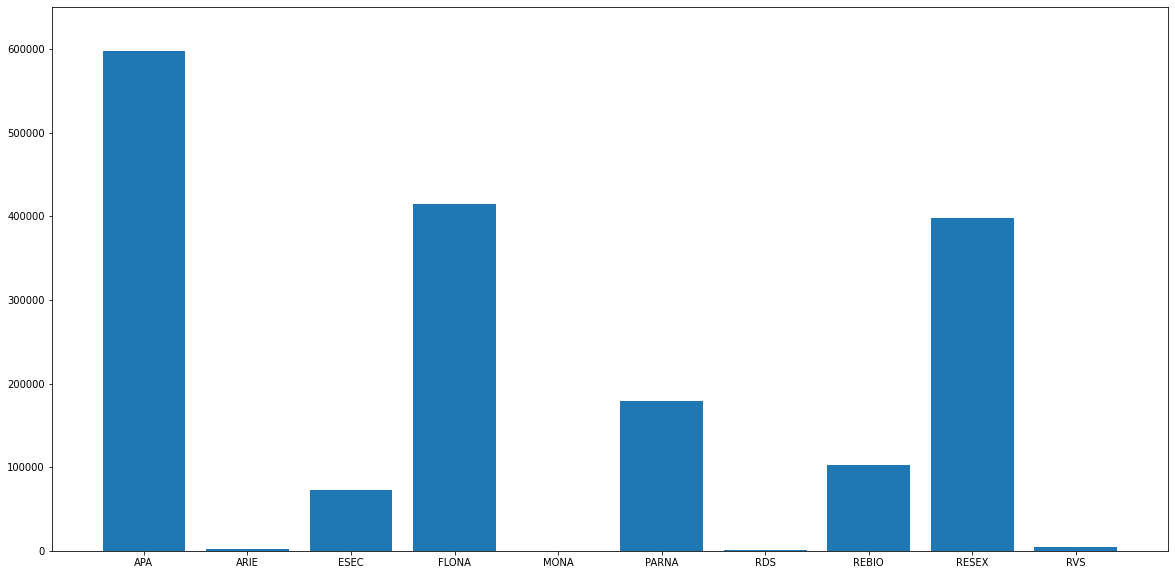

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(data_uc_amount.index, data_uc_amount)
plt.ylim(0,650000)

In [ ]:
px.pie(aux_df, "Categoria da UC: sigla federal",values="Desmatamento total", hole=.55)

### <font color ="#00b8ff"> Monitoramento e desmatamento </font>

In [ ]:
data3 = df.copy()
data3 = data3.drop(["Código CNUC", "Categoria da UC: sigla federal", "Nome da UC", "Categoria da UC: nomenclatura nacional", "Grupo de Proteção", "Ano de criação",
           "Área estimada da UC (ha)", "Bioma referencial"], axis = 1)


In [ ]:
data3.groupby("Monitoramento PRODES").sum()

,PRODES 2020,PRODES 2019,PRODES 2018,PRODES 2017,PRODES 2016,PRODES 2015,PRODES 2014,PRODES 2013,PRODES 2012,PRODES 2011,...,PRODES 2008,PRODES 2007,PRODES 2006,PRODES 2005,PRODES 2004,PRODES 2003,PRODES 2002,PRODES 2001,PRODES (1998 até 2000),PRODES (acumulado até 1997)
Monitoramento PRODES,,,,,,,,,,,,,,,,,,,,,
Não,5.3021,49.3923,12.5858,0.0000,0.000,0.0000,0.0000,0.0000,0.00000,0.00000,...,0.0000,0.0000,0.0000,0.00000,0.00000,0.00000,0.0000,0.00000,0.0000,0.0000
Sim,54492.7932,49344.7447,31848.4419,20817.6936,24329.192,28030.1681,30023.9404,28635.0859,26378.94525,20893.25525,...,45453.5471,49542.3548,41622.6354,69509.61825,128148.75685,110723.91525,68517.2127,97078.90375,465482.5049,324776.9629


In [ ]:
data_uc_monitoring = data3.groupby(["Monitoramento PRODES"]).sum().sum(axis=1)

aux_df2 = pd.DataFrame()
aux_df2["Monitoramento PRODES"] = ["Sem monitoramento", "Com monitoramento"]
aux_df2["Desmatamento total"] = data_uc_monitoring.values
aux_df2

,Monitoramento PRODES,Desmatamento total
0,Sem monitoramento,6.728020e+01
1,Com monitoramento,1.771027e+06


(0.0, 2000000.0)

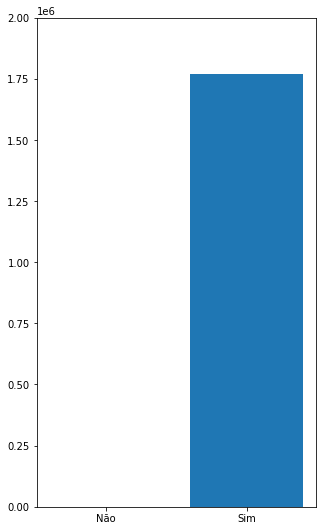

In [ ]:
plt.figure(figsize=(5,9))
plt.bar(data_uc_monitoring.index,data_uc_monitoring)
plt.ylim(0,2000000)

In [ ]:
px.pie(aux_df2, "Monitoramento PRODES",values="Desmatamento total", hole=.55)

# <font color ="#00b8ff"> Parte 5 - Correlações estatísticas e previsões</font>

### <font color ="#00b8ff"> Área total e desmatamento </font>

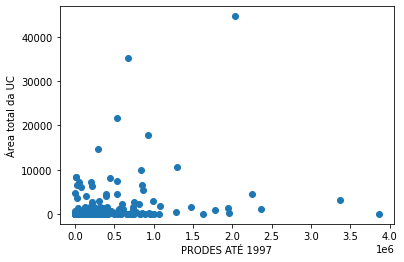

In [ ]:
#Verificar primeiro dois parâmetros
PRODES1997 = df['PRODES (acumulado até 1997)']#acumula 3 anos
AreaUC = df['Área estimada da UC (ha)']

plt.xlabel('PRODES ATÉ 1997')
plt.ylabel('Área total da UC')

plt.scatter(AreaUC, PRODES1997)
plt.show()

In [ ]:
from scipy.stats import linregress

result = linregress (AreaUC, PRODES1997)#regressão a partir de duas colunas
print(f"f(x) = {result.slope}x + {result.intercept}")#encontrar coefiecientes a e b

result

f(x) = 0.0024505286063352207x + 395.0053639141414


LinregressResult(slope=0.0024505286063352207, intercept=395.0053639141414, rvalue=0.2934615318170849, pvalue=6.449457997042813e-08, stderr=0.00044280404629099354, intercept_stderr=232.02170079294828)

R-2: 0.08611967065642993, std_err: 0.00044280404629099354


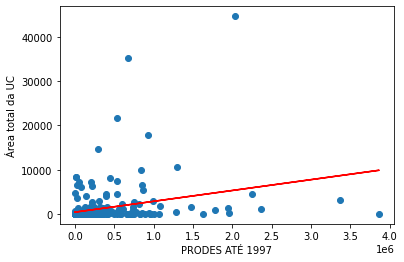

In [ ]:
plt.plot(AreaUC, PRODES1997, 'o', label='original data')
plt.plot(AreaUC, result.intercept + result.slope*AreaUC, 'r', label='fitted line')
plt.xlabel('PRODES ATÉ 1997')
plt.ylabel('Área total da UC')

print(f"R-2: {result.rvalue**2}, std_err: {result.stderr}")
plt.show()

### <font color ="#00b8ff"> Área desmatada e ano </font>

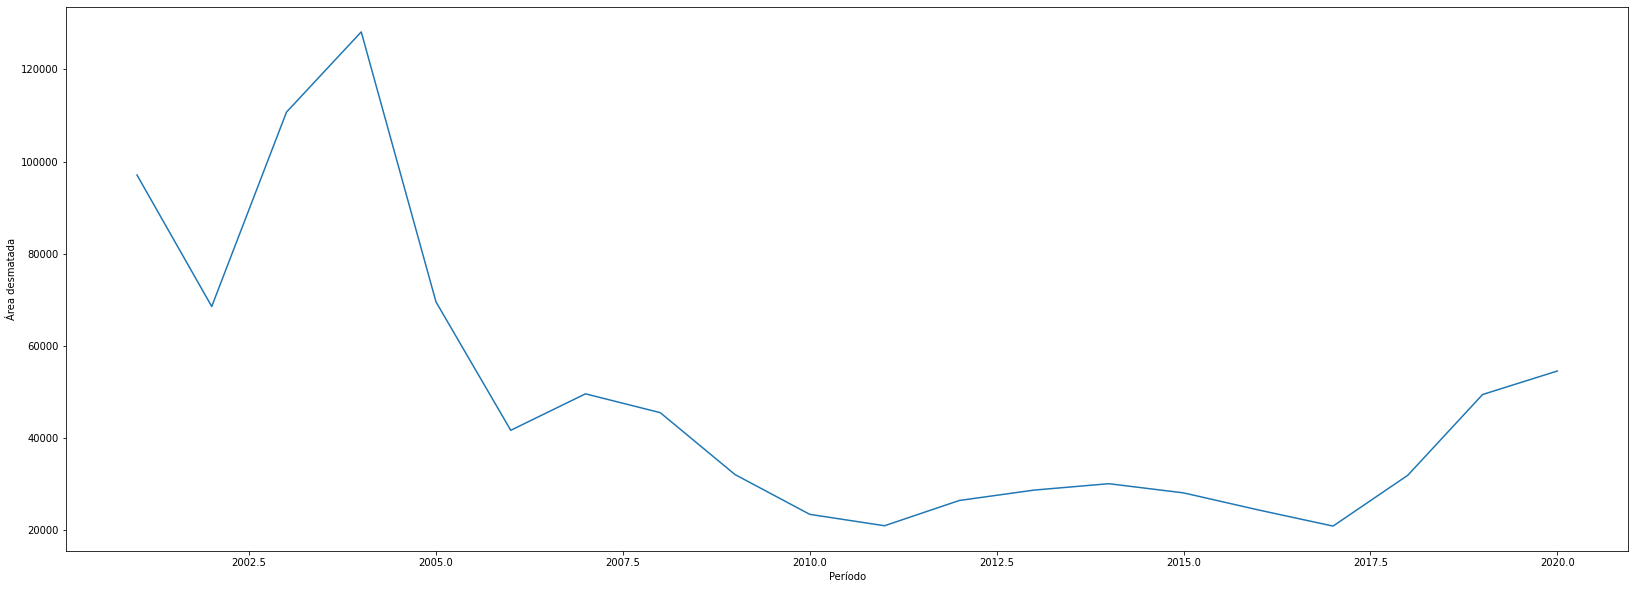

In [ ]:
#Relação de area desmatada por ano (PRODES)


import seaborn as sns

data_sum = df.copy(deep=True)
data_sum = data_sum.drop(["Código CNUC", "Categoria da UC: sigla federal", "Nome da UC", "Categoria da UC: nomenclatura nacional", "Grupo de Proteção", "Ano de criação",
           "Área estimada da UC (ha)", "Bioma referencial", "Monitoramento PRODES","PRODES (acumulado até 1997)","PRODES (1998 até 2000)"], axis = 1)

somas = data_sum.sum(axis = 0)[::-1].reset_index()
somas = somas.rename(columns={ 0 :"Área total","index":"Período"})
somas["Período"] = list(range(2001,2021))

plt.figure(figsize=(28,10))

# x = list(reversed(xaxe))
# y = list(reversed(yaxe))

plt.xlabel('Período')
plt.ylabel('Área desmatada')

plt.plot(somas["Período"], somas["Área total"])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



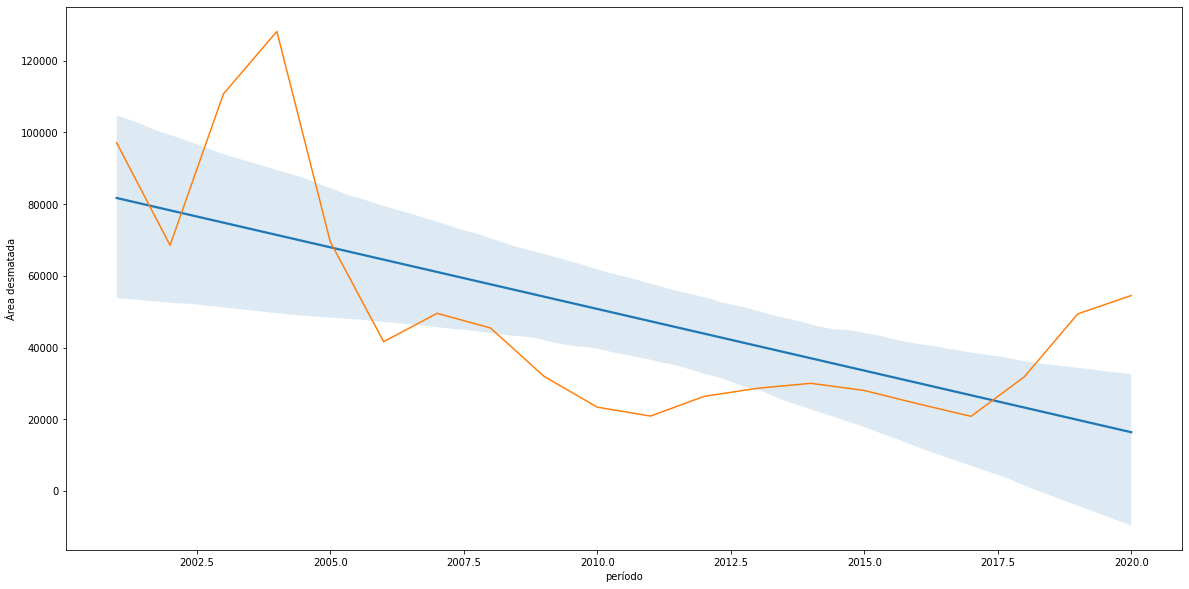

R-2: 0.42602838039765073, std_err: 940.4229200026899


In [ ]:
result = linregress (somas["Período"], somas["Área total"])

plt.figure(figsize=(20,10))
sns.regplot(somas["Período"], somas["Área total"],scatter=False)
plt.plot(somas["Período"], somas["Área total"])
plt.xlabel('período')
plt.ylabel('Área desmatada')
plt.show()
print(f"R-2: {result.rvalue**2}, std_err: {result.stderr}")


Outro método para a regressão linear

In [ ]:
##Relação de area desmatada por ano (PRODES)
anos=df.columns
areas=df.sum()

yaxe=[]
xaxe=[]
for i in range(9,29):
  yaxe.append(areas[i])
  xaxe.append(anos[i])

#invertendo o sentido das listas para que os anos fiquem em ordem crescente
x = list(reversed(xaxe))
y = list(reversed(yaxe))

#novo dataframe com os valores que serão usados na regressão
df_geral = pd.DataFrame(list(zip(x,y)), columns = ['PRODES ANO','DESMATAMENTO'])
df_geral['PRODES ANO']=[int(df_geral.iloc[x,0].split()[1]) for x in range(20)]
df_geral

,PRODES ANO,DESMATAMENTO
0,2001,97078.90375
1,2002,68517.21270
2,2003,110723.91525
3,2004,128148.75685
4,2005,69509.61825
5,2006,41622.63540
6,2007,49542.35480
7,2008,45453.54710
8,2009,32009.54550
9,2010,23366.79550


Regressão linear

In [ ]:
#equação da reta de regressão
from scipy.stats import linregress

result = linregress (df_geral['PRODES ANO'], df_geral['DESMATAMENTO'])

a = result.slope
b = result.intercept

print(f"f(x) = {result.slope}x + {result.intercept}")

f(x) = -3437.4272369924806x + 6959989.2012533825


In [ ]:
import matplotlib.pyplot as plt
#função para gerar linha da reta de regrassão
def gen_line(x_min, x_max, n_points, a, b):
    interval = x_max-x_min
    interval_value = interval/n_points

    x_result = []
    y_result = []

    for i in range(n_points):
        current_x = x_min+i*interval_value
        x_result.append(current_x)
        y_result.append(a*current_x + b)

    return x_result, y_result

#função para plotagem da disperção e da reta de regressão
def show_regression(x, y, a, b):
    N = 100

    plt.scatter(x, y)

    line_1 = gen_line(min(x), max(x), N, a, b)
    plt.plot(line_1[0], line_1[1], c= "red")

    plt.gca()
    plt.show()
#função para  predição da área de desmaramento em anos futuros
def predict(ano_futuro):
  return ((a* ano_futuro) + b)

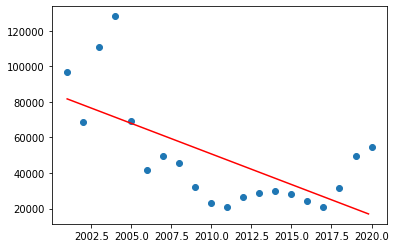

In [ ]:
#plotagem da disperção e da reta de regressão
show_regression(df_geral['PRODES ANO'], df_geral['DESMATAMENTO'], a, b)

In [ ]:
#predição para 2022
print(predict(2022))

9511.328054586425


# <font color ="#00b8ff"> Parte 6 - Correlação com outras fontes de dados</font>

DADOS DO AGRONEGÓCIO ABAIXO

In [ ]:
import pandas as pd

# Dados 2017
csv_link5 = "https://raw.githubusercontent.com/mariliabrito/DesmatamentoUCS/main/dados_2017.csv"

# Conversão de CSV em DataFrame
df_2017 = pd.read_csv(csv_link5, encoding = 'latin-1', sep=";", on_bad_lines='skip')
df_2017 = df_2017.dropna()
df_2017

,UF,Número de estabelecimentos agropecuários (Unidades),Área dos estabelecimentos agropecuários (Hectares)
0,Rondônia,91438.0,9219883.0
1,Acre,37356.0,4232700.0
2,Amazonas,80959.0,4018578.0
3,Roraima,16846.0,2636279.0
4,Pará,281699.0,28419453.0
5,Amapá,8507.0,1506294.0
6,Tocantins,63808.0,15180162.0
7,Maranhão,219765.0,12238489.0
8,Piauí,245601.0,10009858.0
9,Ceará,394330.0,6908179.0


In [ ]:
import numpy as np
import pandas as pd

# Quantidade de estabelecimentos da agropecuária por UF
csv_link3 = "https://raw.githubusercontent.com/mariliabrito/DesmatamentoUCS/main/quant_agro.csv"

# Conversão de CSV em DataFrame
df_quant = pd.read_csv(csv_link3, encoding = 'UTF-8', sep=",", on_bad_lines='skip')

# Pequenos ajustes no df
df_quant = df_quant.rename(columns={'Unidade da Federação' : 'UF'})
df_quant = df_quant.replace({'...':'0'})
df_quant = df_quant.drop(19)
df_quant = df_quant.reset_index()
df_quant = df_quant.dropna()
df_quant['2017'] = df_2017['Número de estabelecimentos agropecuários (Unidades)']

# Conversão de object
for col in  df_quant.columns[4:11]:
    df_quant[col] = pd.to_numeric(df_quant[col], errors='coerce')
df_quant

,index,Nível,Cód.,UF,1970,1975,1980,1985,1995,2006,2017
0,0,UF,11,Rondônia,7082,25483,48371,80615,76956,87078,91438.0
1,1,UF,12,Acre,23102,25001,27371,35049,23788,29483,37356.0
2,2,UF,13,Amazonas,85251,92741,100623,116302,83289,66784,80959.0
3,3,UF,14,Roraima,1953,3019,3742,6389,7476,10310,16846.0
4,4,UF,15,Pará,141442,186954,223762,253222,206404,222029,281699.0
5,5,UF,16,Amapá,2315,4009,4304,4816,3349,3527,8507.0
6,6,UF,17,Tocantins,0,0,0,47320,44913,56567,63808.0
7,7,UF,21,Maranhão,396761,496737,496758,531413,368191,287039,219765.0
8,8,UF,22,Piauí,217886,216704,249129,270443,208111,245378,245601.0
9,9,UF,23,Ceará,245432,251650,245878,324278,339602,381017,394330.0


In [ ]:
import numpy as np

# Área ocupada pela agropecuária por UF
csv_link4 = "https://raw.githubusercontent.com/mariliabrito/DesmatamentoUCS/main/area_agro.csv"

# Conversão de CSV em DataFrame
df_area = pd.read_csv(csv_link4, encoding = 'UTF-8', sep=",", on_bad_lines='skip')

# Ajustes no df
df_area = df_area.rename(columns={'Unidade da Federação':'UF'})
df_area = df_area.replace({'...':'0'})
df_area = df_area.drop(19)
df_area = df_area.reset_index()
df_area['2017'] = df_2017['Área dos estabelecimentos agropecuários (Hectares)']

# Conversão de object
for col in  df_area.columns[4:11]:
    df_area[col] = pd.to_numeric(df_area[col], errors='coerce')

df_area

,index,Nível,Cód.,UF,1970,1975,1980,1985,1995,2006,2017
0,0,UF,11,Rondônia,1631640.0,3082052.0,5223630.0,6032645.0,8890440.0,8433867.76,9219883.0
1,1,UF,12,Acre,4122084.0,4291777.0,5679532.0,5234762.0,3183065.0,3528542.74,4232700.0
2,2,UF,13,Amazonas,4475941.0,6497198.0,7009594.0,5859511.0,3322566.0,3668753.07,4018578.0
3,3,UF,14,Roraima,1594398.0,1836202.0,2463106.0,2149536.0,2976817.0,1717531.97,2636279.0
4,4,UF,15,Pará,10754828.0,16166733.0,20448421.0,24727830.0,22520229.0,22925330.66,28419453.0
5,5,UF,16,Amapá,603441.0,742001.0,735128.0,1208020.0,700047.0,873788.50,1506294.0
6,6,UF,17,Tocantins,0.0,0.0,0.0,17354402.0,16765716.0,14387949.21,15180162.0
7,7,UF,21,Maranhão,10794912.0,12409067.0,15134236.0,15548267.0,12560692.0,13033567.52,12238489.0
8,8,UF,22,Piauí,9606730.0,10523517.0,11162096.0,11828025.0,9659972.0,9506597.39,10009858.0
9,9,UF,23,Ceará,12104811.0,10991579.0,11743268.0,11009161.0,8963842.0,7948066.68,6908179.0


In [ ]:
df_area.describe()

,index,Cód.,1970,1975,1980,1985,1995,2006,2017
count,27.000000,27.000000,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,13.296296,29.111111,9.415367e+06,1.142436e+07,1.281982e+07,1.388611e+07,1.309634e+07,1.235852e+07,1.301073e+07
std,8.310396,13.024631,1.006457e+07,1.124682e+07,1.249687e+07,1.279656e+07,1.317525e+07,1.243475e+07,1.364060e+07
min,0.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.138220e+05,2.449300e+05,2.513197e+05,2.570470e+05
25%,6.500000,19.000000,1.990861e+06,3.264114e+06,3.489806e+06,4.139222e+06,3.252816e+06,3.013891e+06,2.984956e+06
50%,13.000000,27.000000,4.582830e+06,6.497198e+06,7.009594e+06,7.419541e+06,8.890440e+06,7.948067e+06,6.908179e+06
75%,20.500000,38.000000,1.336517e+07,1.836116e+07,2.030471e+07,2.203349e+07,1.958505e+07,1.864083e+07,1.909835e+07
max,27.000000,53.000000,4.200855e+07,4.462333e+07,4.636229e+07,4.583665e+07,4.983963e+07,4.868871e+07,5.492285e+07


In [ ]:
df_quant.describe()

,index,Cód.,1970,1975,1980,1985,1995,2006,2017
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,13.296296,29.111111,178755.925926,183393.296296,189508.592593,214881.814815,179994.962963,191690.222222,187900.888889
std,8.310396,13.024631,180114.846738,173632.586322,181177.158903,196704.716743,172414.108560,182545.714935,180188.885822
min,0.000000,11.000000,0.000000,0.000000,0.000000,3420.000000,2459.000000,3527.000000,5246.000000
25%,6.500000,19.000000,34596.000000,56985.500000,53875.500000,73530.500000,63484.000000,65824.000000,68194.000000
50%,13.000000,27.000000,105160.000000,111903.000000,110652.000000,131365.000000,111791.000000,123332.000000,118679.000000
75%,20.500000,38.000000,286106.000000,264999.500000,261158.000000,303174.000000,238323.000000,266208.500000,263644.500000
max,27.000000,53.000000,554488.000000,548123.000000,637225.000000,739006.000000,699126.000000,761558.000000,762848.000000


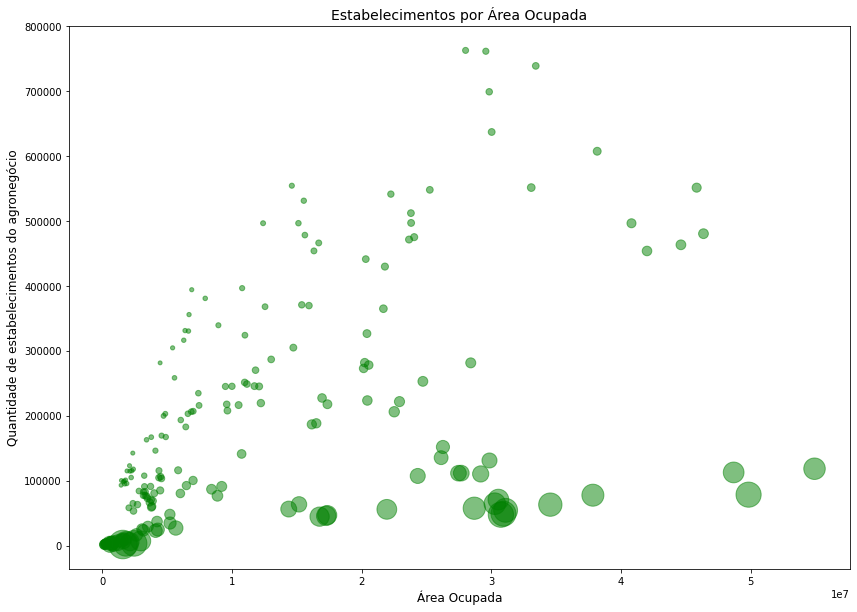

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

censo = ['1970', '1975', '1980', '1985', '1995', '2006', '2017']
UF = df_area['UF']
area_med = df_area[censo]/df_quant[censo]

plt.figure(figsize=(14,10))
plt.title('Estabelecimentos por Área Ocupada', fontsize=14)
plt.xlabel('Área Ocupada', fontsize=12)
plt.ylabel('Quantidade de estabelecimentos do agronegócio', fontsize=12)
plt.style.use("seaborn-colorblind")
plt.scatter(df_area[censo], df_quant[censo], color = 'green', alpha = 0.5, s=area_med)
plt.show()

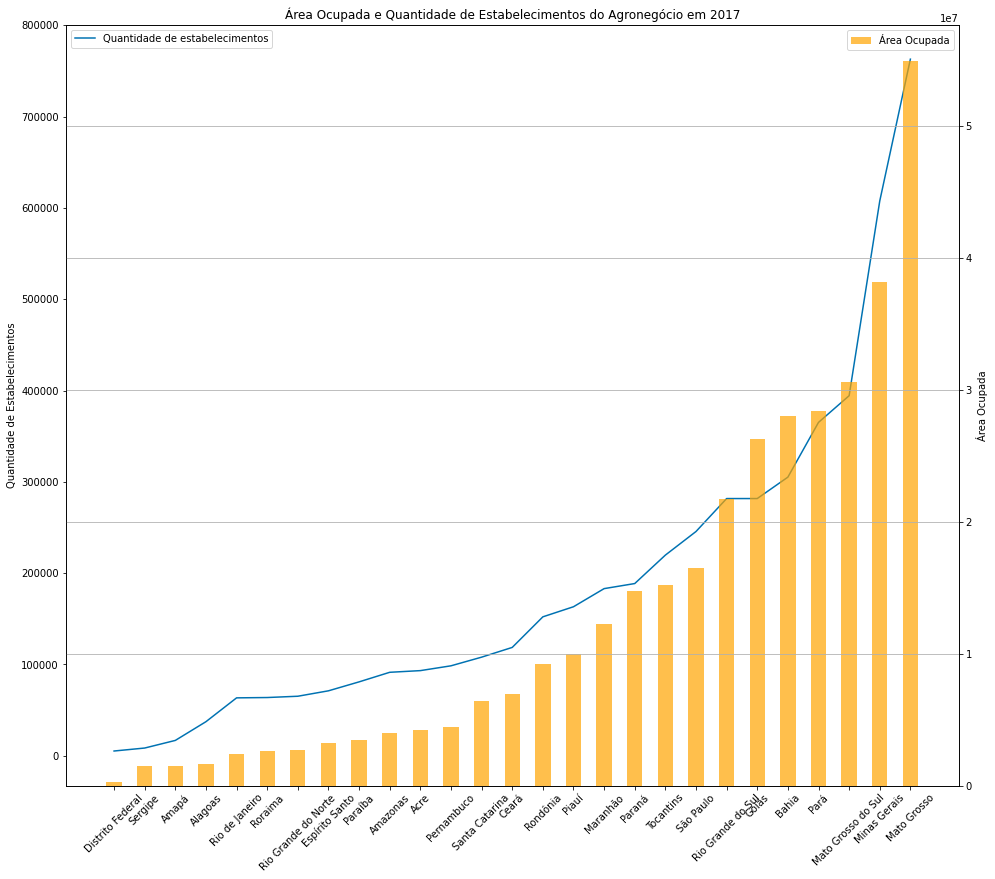

In [ ]:
#Dados atuais de ocupação agronegócio

area_2017 = df_area[['UF', '2017']].sort_values(by='2017')
quant_2017 = df_quant[['UF', '2017']].sort_values(by='2017')

fig, ax1 = plt.subplots(figsize=(16,14))
plt.xticks(rotation=45)
plt.title('Área Ocupada e Quantidade de Estabelecimentos do Agronegócio em 2017')

ax1.plot(area_2017['UF'], quant_2017['2017'])
ax1.set_ylabel('Quantidade de Estabelecimentos')
ax1.legend(['Quantidade de estabelecimentos'], loc="upper left")

ax2 = ax1.twinx()

ax2.bar(area_2017['UF'], area_2017['2017'], width=0.5, alpha=0.7, color='orange')
ax2.grid(True)
ax2.set_ylabel('Área Ocupada')
ax2.legend(['Área Ocupada'], loc="upper right")
plt.show()

In [ ]:
# Correlação entre Área Ocupada e Quantidade de estabeleciemntos do agronegócio em 2017
from numpy.lib.function_base import corrcoef
print(corrcoef(area_2017['2017'], quant_2017['2017']))

[[1.         0.98327929]
 [0.98327929 1.        ]]


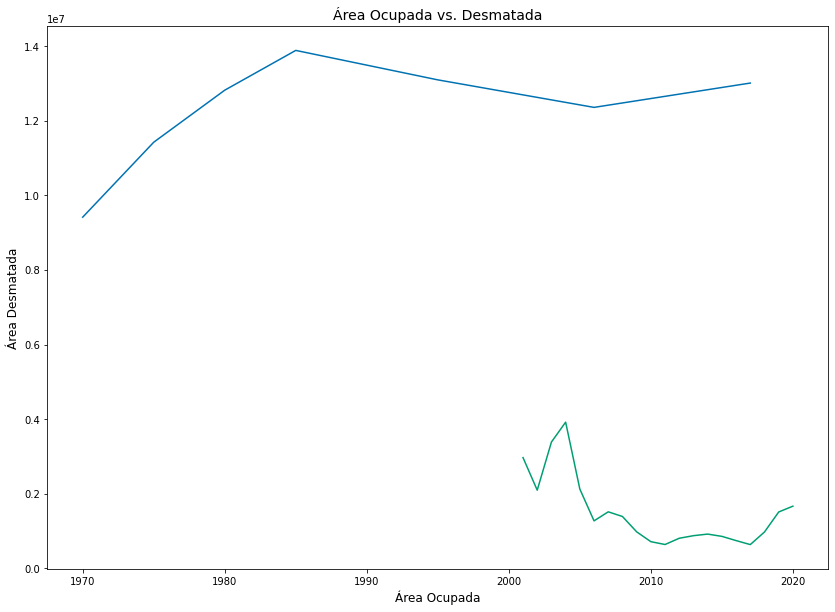

In [ ]:
area_desm = ['PRODES 2020', 'PRODES 2019', 'PRODES 2018',
       'PRODES 2017', 'PRODES 2016', 'PRODES 2015', 'PRODES 2014',
       'PRODES 2013', 'PRODES 2012', 'PRODES 2011', 'PRODES 2010',
       'PRODES 2009', 'PRODES 2008', 'PRODES 2007', 'PRODES 2006',
       'PRODES 2005', 'PRODES 2004', 'PRODES 2003', 'PRODES 2002',
       'PRODES 2001', 'PRODES (1998 até 2000)', 'PRODES (acumulado até 1997)']
media_area_oc = df_area[censo].mean()
media_area_oc.index = [int(a) for a in media_area_oc.index]
media_area_desm = df[area_desm].mean()

undesirable_columns = ["PRODES (1998 até 2000)","PRODES (acumulado até 1997)"]
media_area_desm = media_area_desm.drop(undesirable_columns)
media_area_desm.index = [int(a.split(" ")[1]) for a in media_area_desm.index]
media_area_desm*=10000
media_area_desm=media_area_desm[::-1]

plt.figure(figsize=(14,10))
plt.title('Área Ocupada vs. Desmatada', fontsize=14)
plt.xlabel('Área Ocupada', fontsize=12)
plt.ylabel('Área Desmatada', fontsize=12)
plt.plot(media_area_oc)
plt.plot(media_area_desm)
plt.show()

DADOS DE FOCOS DE CALOR ABAIXO

In [ ]:
import pandas as pd
# CSV Incêndios florestais - focos de calor
csv_link2 = "http://dados.agricultura.gov.br/dataset/420c0514-92da-4888-be85-290a0785e8a9/resource/f192c841-b95f-4e6e-9a32-70db6838e6f1/download/rfincendiosflorestaisfocoscalorestados1998-2017.csv"

# Conversão de CSV em DataFrame
df2 = pd.read_csv(csv_link2, encoding = 'latin-1',delimiter="\\t")

df2

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,"""Ano",Estado,Mês,Número,"Período"""
0,"""1998",Acre,Janeiro,0.0,"01/01/1998"""
1,"""1999",Acre,Janeiro,0.0,"01/01/1999"""
2,"""2000",Acre,Janeiro,0.0,"01/01/2000"""
3,"""2001",Acre,Janeiro,0.0,"01/01/2001"""
4,"""2002",Acre,Janeiro,0.0,"01/01/2002"""
...,...,...,...,...,...
6449,"""2012",Tocantins,Dezembro,128.0,"01/01/2012"""
6450,"""2013",Tocantins,Dezembro,85.0,"01/01/2013"""
6451,"""2014",Tocantins,Dezembro,223.0,"01/01/2014"""
6452,"""2015",Tocantins,Dezembro,373.0,"01/01/2015"""


In [ ]:
df2 = df2.applymap(lambda x: x.replace('"', '') if (isinstance(x, str)) else x)
df2 = df2.rename(columns={'"Ano': 'Ano', 'Período"':'Período'})
df2 = df2.drop('Período', 1)
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,Ano,Estado,Mês,Número
0,1998,Acre,Janeiro,0.0
1,1999,Acre,Janeiro,0.0
2,2000,Acre,Janeiro,0.0
3,2001,Acre,Janeiro,0.0
4,2002,Acre,Janeiro,0.0
...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0
6450,2013,Tocantins,Dezembro,85.0
6451,2014,Tocantins,Dezembro,223.0
6452,2015,Tocantins,Dezembro,373.0


In [ ]:
df2.fillna('0')
df2['Número'].describe()

count    6454.000000
mean      108.293163
std       190.812242
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: Número, dtype: float64

In [ ]:
#foco de calor por estado

fc_est = df2.groupby(by=["Estado"])["Número"].sum()
fc_est = fc_est.sort_values()
fc_est

Estado
Sergipe                 3237.000
Distrito Federal        3561.000
Alagoas                 4644.000
Espírito Santo          6546.000
Rio Grande do Norte     9426.000
Rio de Janeiro         11703.000
Paraíba                12787.000
Acre                   18464.030
Rondônia               20285.429
Amapá                  21831.576
Rio Grande do Sul      24031.865
Santa Catarina         24359.852
Roraima                24385.074
Pernambuco             24498.000
Pará                   24512.144
Maranhão               25129.131
Ceará                  30428.063
Amazonas               30650.129
Tocantins              33707.885
Minas Gerais           37475.258
Goiás                  37695.520
Piauí                  37803.747
Paraná                 39648.918
Bahia                  44746.226
Mato Grosso do Sul     47768.201
Mato Grosso            48477.827
São Paulo              51121.198
Name: Número, dtype: float64

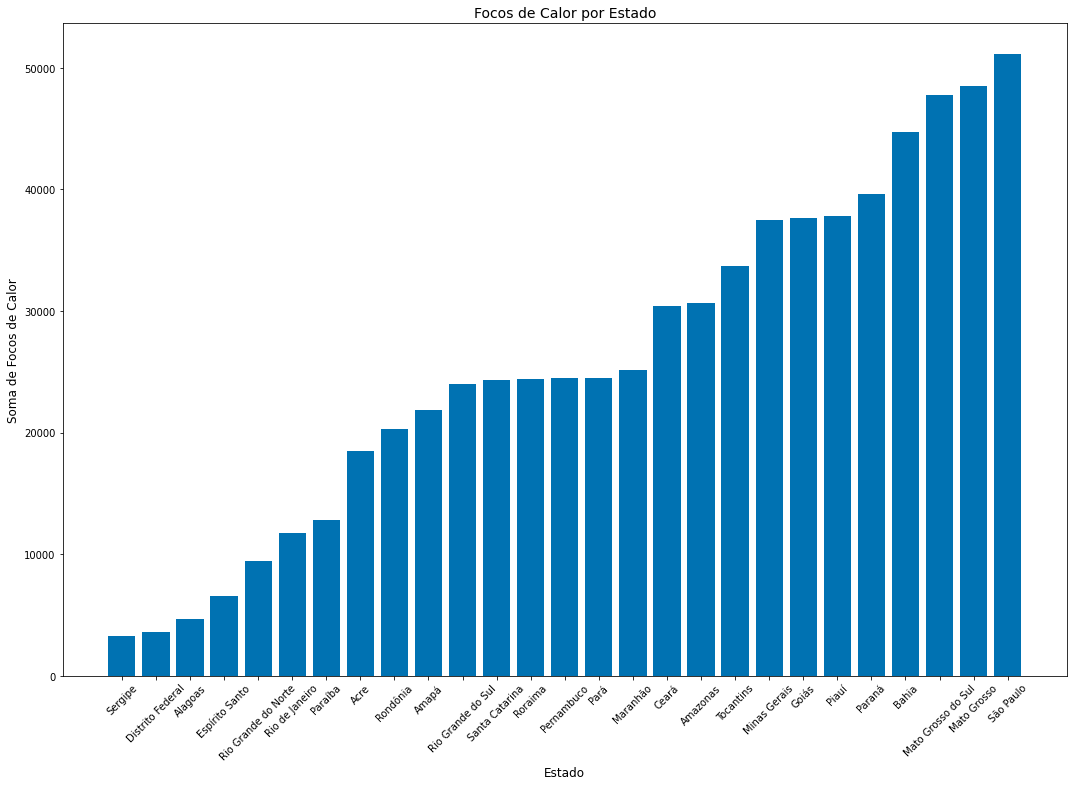

In [ ]:
plt.figure(figsize=(18,12))
plt.xlabel('Estado', fontsize=12)
plt.title('Focos de Calor por Estado', fontsize=14)
plt.ylabel('Soma de Focos de Calor', fontsize=12)
plt.xticks(rotation = 45)
plt.bar(fc_est.index, fc_est)
plt.show()

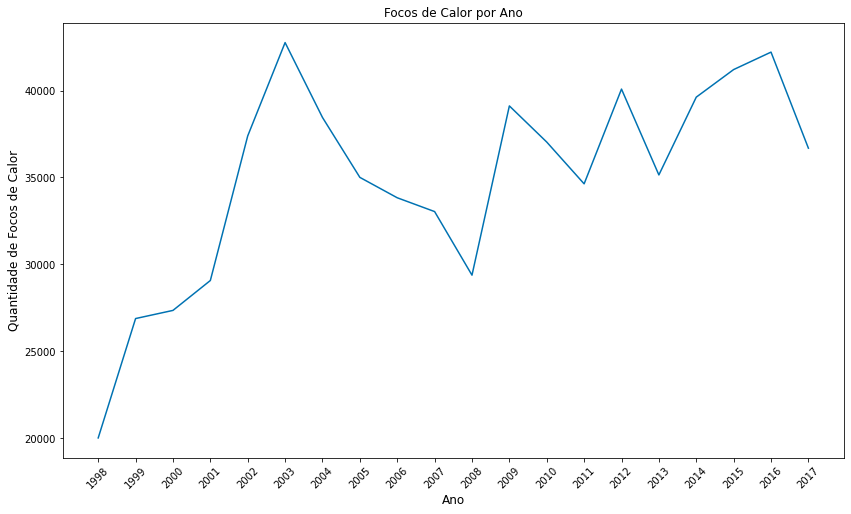

In [ ]:
fc_ano = df2.groupby(by=df2['Ano'])['Número'].sum()

plt.figure(figsize=(14,8))
plt.xticks(rotation = 45)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Focos de Calor', fontsize=12)
plt.title('Focos de Calor por Ano')
plt.plot(fc_ano)
plt.show()

In [ ]:
# import datetime as dt

# data_desm = pd.read_csv("inpe_brazilian_amazon_fires_1999_2019.csv")
# data_filter = data_desm.groupby("year").agg({"firespots":"sum"})

# data_filter.index = [dt.datetime(date,1,1) for date in data_filter.index  ]
# plt.plot(data_filter)